# Damped harmonic osciallator

In [1]:
from train_test_utils import LossDistribution

In [2]:
import os
import re
import matplotlib.pyplot as plt
from typing import Dict, List

In [3]:
def all_plots_for_datafile(filepath: str) -> None:
    l = LossDistribution(filepath)
    l.plot_relmeandiff_vs_epoch()

In [4]:
def compile_loss_distributions() -> List[LossDistribution]:
    def get_friction_coef(path: str) -> float:
        x = re.search("friction=(0.[0-9]+)", path)
        if x is None:
            raise ValueError(f"path {path} doesn't have friction in it")
            
        return float(x.groups()[0])
        
    root, _, files = next(os.walk("20230507_distributions/"))
    files = [os.path.join(root, f) for f in files if "damped_harmonic_oscillator_friction" in f]
    loss_distributions = [LossDistribution(path) for path in files]
    for l in loss_distributions:
        l.friction = get_friction_coef(l.filepath)
        
    loss_distributions = sorted(loss_distributions, key=lambda l: l.friction)
    return loss_distributions

loss_distributions = compile_loss_distributions()
print(len(loss_distributions))
loss_distributions[0].friction

8


0.0

friction: 0.0


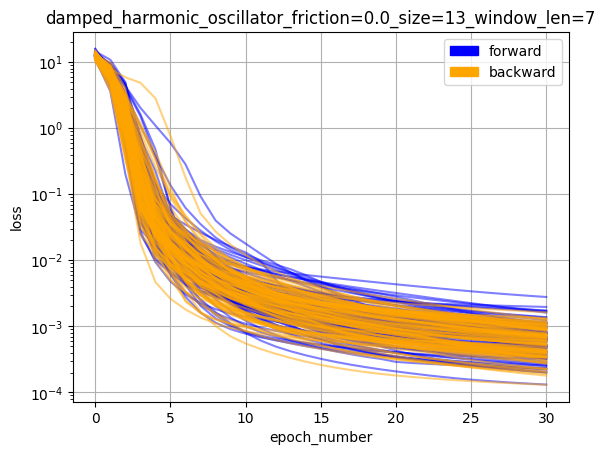

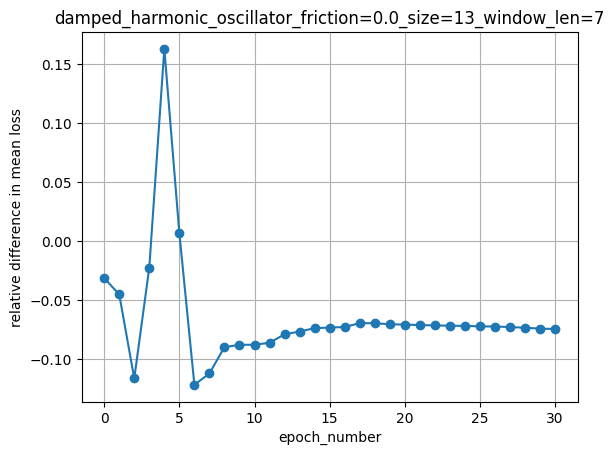

friction: 0.0025


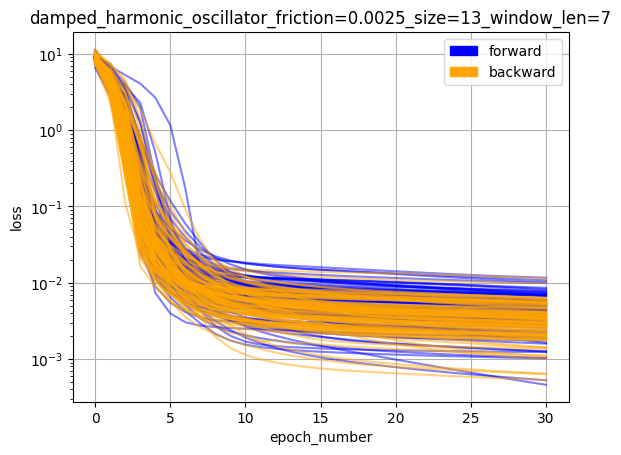

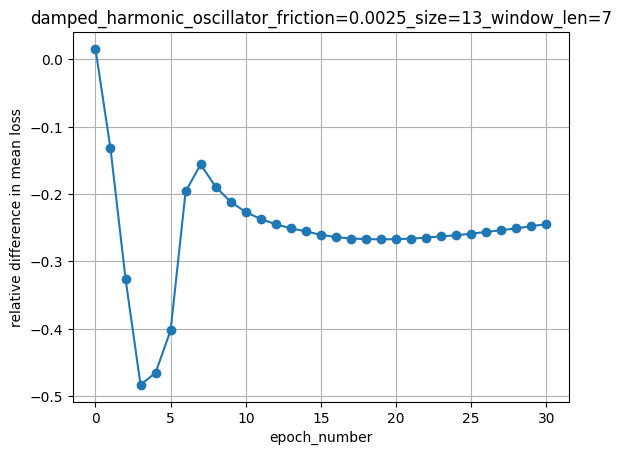

friction: 0.005


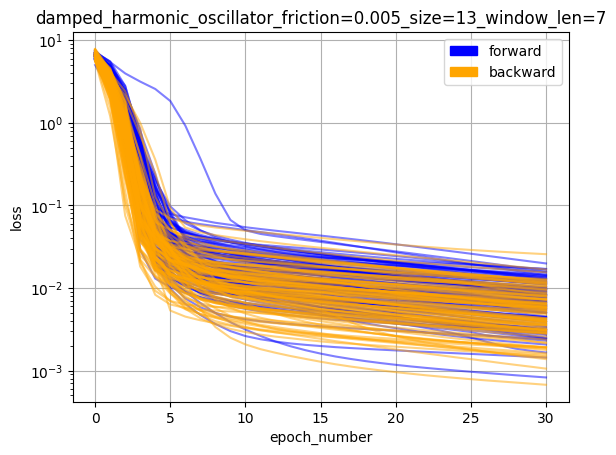

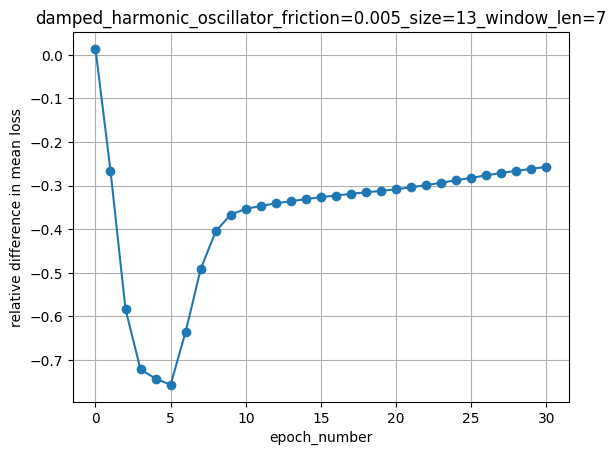

friction: 0.0075


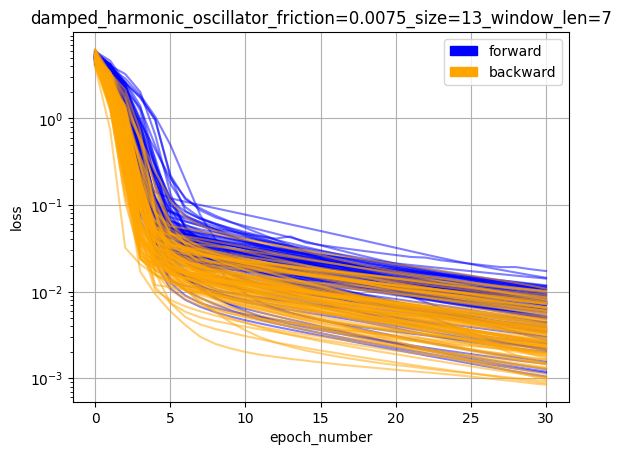

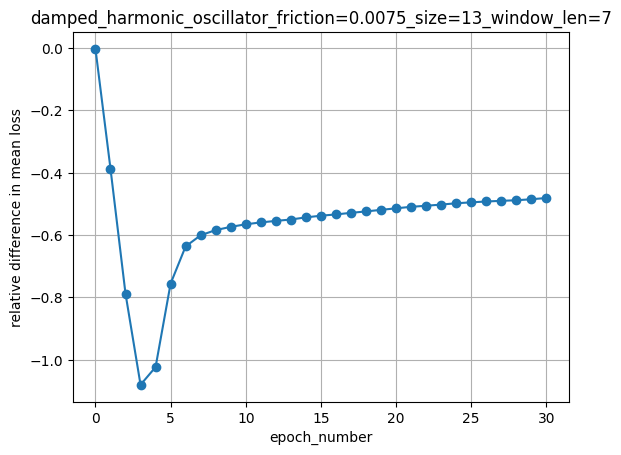

friction: 0.01


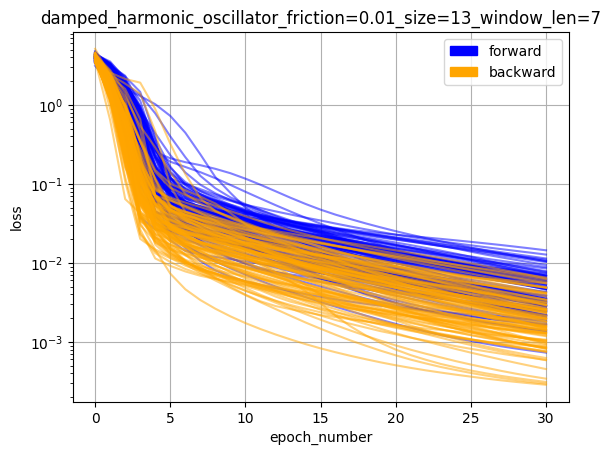

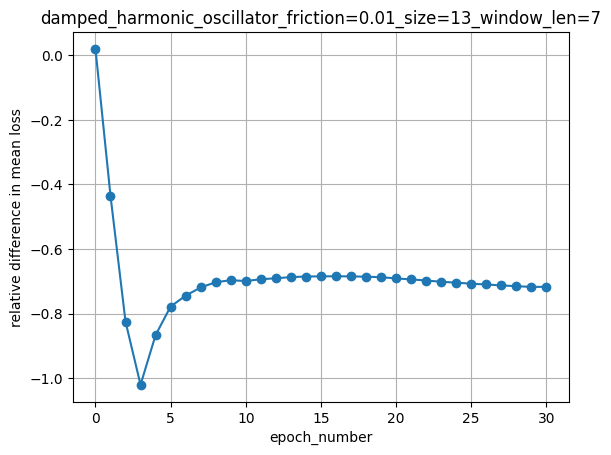

friction: 0.015


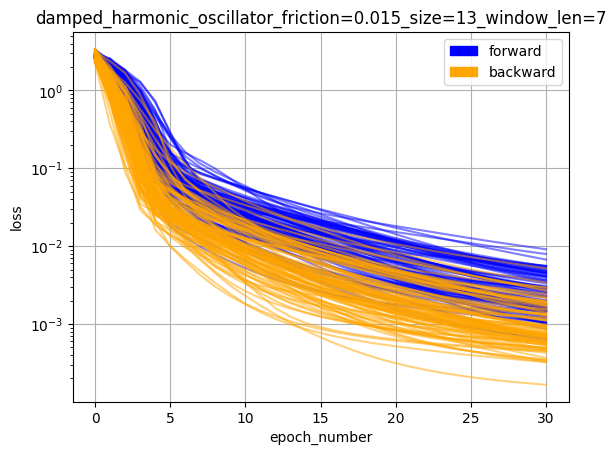

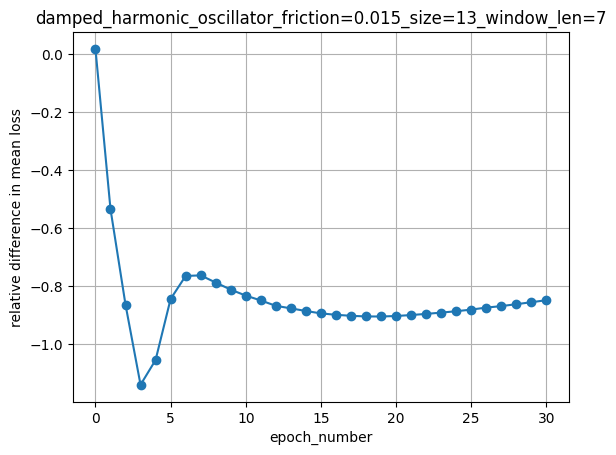

friction: 0.02


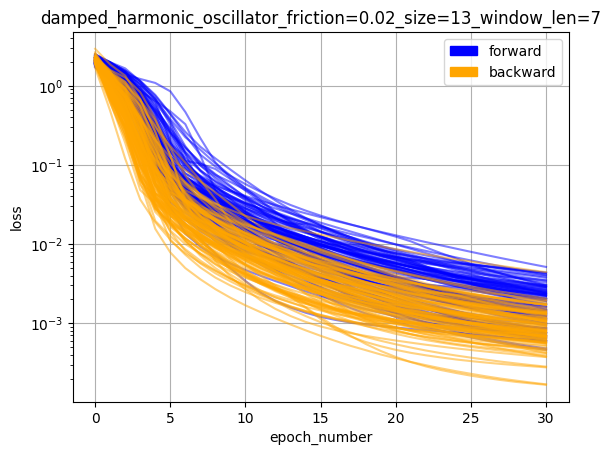

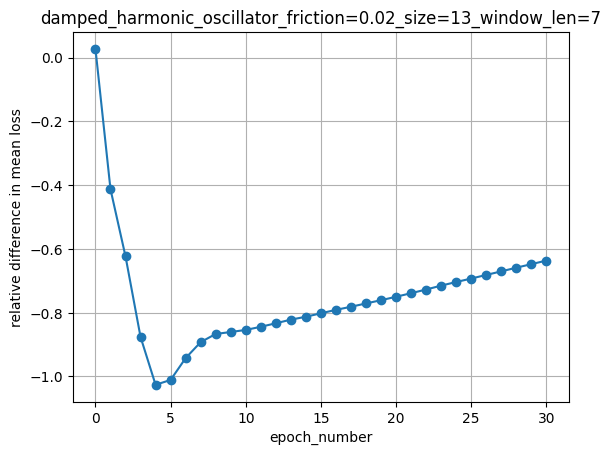

friction: 0.03


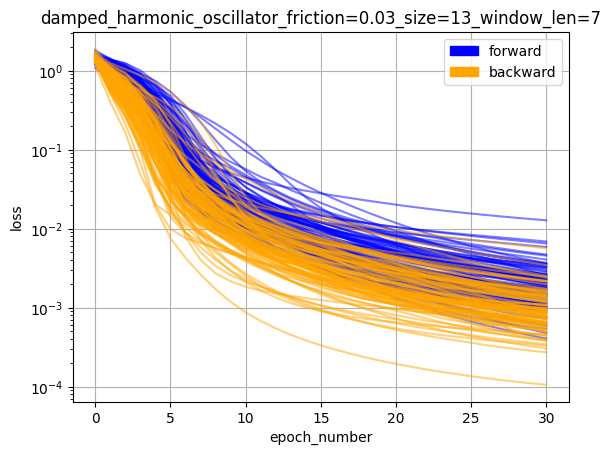

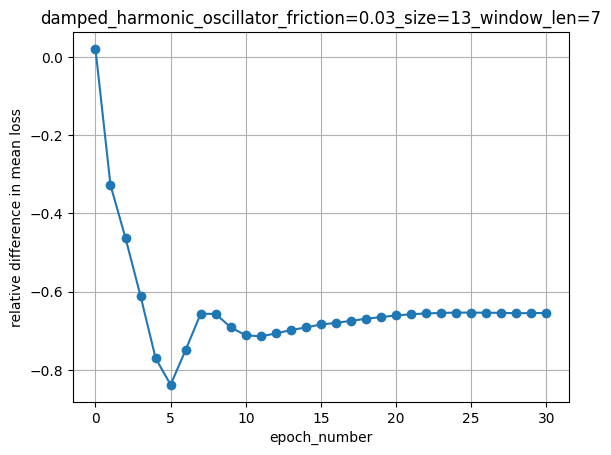

In [5]:
for l in loss_distributions:
    print(f"friction: {l.friction}")
    l.plot_learning_curves()
    l.plot_relmeandiff_vs_epoch()

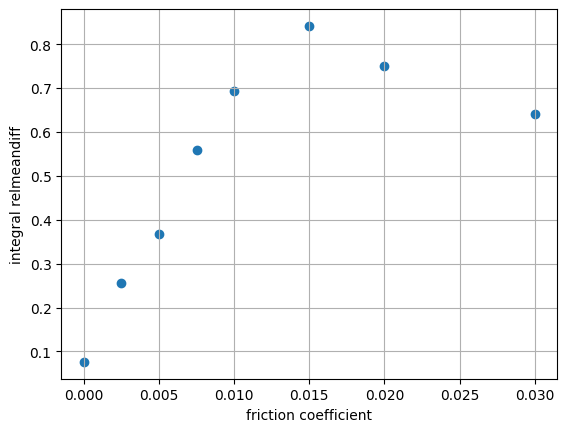

In [6]:
def plot_integral_relmindiff_vs_friction(loss_distributions) -> None:
    frictions = [l.friction for l in loss_distributions]
    def integral_relmindiff(l: LossDistribution) -> float:
        return np.mean(np.abs(l.relmeandiff_all()))
    
    integral_relmindiffs = [integral_relmindiff(l) for l in loss_distributions]
    plt.scatter(frictions, integral_relmindiffs)
    plt.grid()
    plt.xlabel("friction coefficient")
    plt.ylabel("integral relmeandiff")
    plt.show()
    
plot_integral_relmindiff_vs_friction(loss_distributions)